In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
import ast

Load the recipe dataset and create dataframe.

In [3]:
recipe_df = pd.read_csv(r"C:\Users\cryst\Desktop\BrainStation - Data Science\Capstone\Capstone Files\data\recipe_dataset.csv")

Adjusting the width of the column to display all content in the columns. I also wanted to make sure that the information was not truncated in the dataset.

In [5]:
pd.set_option('display.max_colwidth', None)

### 1. Data Understanding

##### **1.1 Shape and First Look of the Dataframe.**

In [8]:
print(f'This dataset contains {recipe_df.shape[0]} rows and {recipe_df.shape[1]} columns')

This dataset contains 2231142 rows and 7 columns


Peep into the dataframe.

In [10]:
recipe_df.head()

,Unnamed: 0,title,ingredients,directions,link,source,NER
0,0,No-Bake Nut Cookies,"[""1 c. firmly packed brown sugar"", ""1/2 c. evaporated milk"", ""1/2 tsp. vanilla"", ""1/2 c. broken nuts (pecans)"", ""2 Tbsp. butter or margarine"", ""3 1/2 c. bite size shredded rice biscuits""]","[""In a heavy 2-quart saucepan, mix brown sugar, nuts, evaporated milk and butter or margarine."", ""Stir over medium heat until mixture bubbles all over top."", ""Boil and stir 5 minutes more. Take off heat."", ""Stir in vanilla and cereal; mix well."", ""Using 2 teaspoons, drop and shape into 30 clusters on wax paper."", ""Let stand until firm, about 30 minutes.""]",www.cookbooks.com/Recipe-Details.aspx?id=44874,Gathered,"[""brown sugar"", ""milk"", ""vanilla"", ""nuts"", ""butter"", ""bite size shredded rice biscuits""]"
1,1,Jewell Ball'S Chicken,"[""1 small jar chipped beef, cut up"", ""4 boned chicken breasts"", ""1 can cream of mushroom soup"", ""1 carton sour cream""]","[""Place chipped beef on bottom of baking dish."", ""Place chicken on top of beef."", ""Mix soup and cream together; pour over chicken. Bake, uncovered, at 275\u00b0 for 3 hours.""]",www.cookbooks.com/Recipe-Details.aspx?id=699419,Gathered,"[""beef"", ""chicken breasts"", ""cream of mushroom soup"", ""sour cream""]"
2,2,Creamy Corn,"[""2 (16 oz.) pkg. frozen corn"", ""1 (8 oz.) pkg. cream cheese, cubed"", ""1/3 c. butter, cubed"", ""1/2 tsp. garlic powder"", ""1/2 tsp. salt"", ""1/4 tsp. pepper""]","[""In a slow cooker, combine all ingredients. Cover and cook on low for 4 hours or until heated through and cheese is melted. Stir well before serving. Yields 6 servings.""]",www.cookbooks.com/Recipe-Details.aspx?id=10570,Gathered,"[""frozen corn"", ""cream cheese"", ""butter"", ""garlic powder"", ""salt"", ""pepper""]"
3,3,Chicken Funny,"[""1 large whole chicken"", ""2 (10 1/2 oz.) cans chicken gravy"", ""1 (10 1/2 oz.) can cream of mushroom soup"", ""1 (6 oz.) box Stove Top stuffing"", ""4 oz. shredded cheese""]","[""Boil and debone chicken."", ""Put bite size pieces in average size square casserole dish."", ""Pour gravy and cream of mushroom soup over chicken; level."", ""Make stuffing according to instructions on box (do not make too moist)."", ""Put stuffing on top of chicken and gravy; level."", ""Sprinkle shredded cheese on top and bake at 350\u00b0 for approximately 20 minutes or until golden and bubbly.""]",www.cookbooks.com/Recipe-Details.aspx?id=897570,Gathered,"[""chicken"", ""chicken gravy"", ""cream of mushroom soup"", ""shredded cheese""]"
4,4,Reeses Cups(Candy),"[""1 c. peanut butter"", ""3/4 c. graham cracker crumbs"", ""1 c. melted butter"", ""1 lb. (3 1/2 c.) powdered sugar"", ""1 large pkg. chocolate chips""]","[""Combine first four ingredients and press in 13 x 9-inch ungreased pan."", ""Melt chocolate chips and spread over mixture. Refrigerate for about 20 minutes and cut into pieces before chocolate gets hard."", ""Keep in refrigerator.""]",www.cookbooks.com/Recipe-Details.aspx?id=659239,Gathered,"[""peanut butter"", ""graham cracker crumbs"", ""butter"", ""powdered sugar"", ""chocolate chips""]"


At first glance, this dataset seems to contain several variables that would be helpful for my project to build a recipe recommendation tool based on ingredients. Some really useful variables for this purpose would be 'title', 'ingredients', 'directions' and 'NER' (Name Entity Recognizer). Other variables contained in this dataset include 'link' which contains the same information as 'directions', but the link takes users to additional features such as printing, e-mailing, saving the recipe. 'source' just tells us how the recipe was gathered.

As for the drawbacks of this dataset, this doesn't contain the number of calories, but I can attempt to extract the quantities for different recipes for each ingredient, and map them using a different dataset to extract their nutritional value.

Another limitation of this dataset is that this method of calculating calories would give us the total calories per recipe, and not necessarily per meal, so I would need to divide the total calories in the recipe by the servings yielded from the recipe. After looking a bit further, it seems that the 'directions' column contains the information on serving sizes, so I can extract the amount of servings that each recipe yields and build a numerical column to divide the total calories by. The only drawback of this approach is that not all of the recipes contain the serving sizes, so for this project I will limit the focus on the subset of recipes that do contain the serving size. Knowing the amount of servings that the recipe yield would still be useful information in case the user is interested in knowing how much food the recipe yields in case they want to make adjustments to the ingredient quantities depending on how much food they want to prepare, which could help with reducing waste shall the recipe yield too much food for their needs.

##### **1.2. Data Types.**

Next, we will take a look at `recipe_df.info()` to print information on column names, data types, and total number of observations.

In [14]:
recipe_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2231142 entries, 0 to 2231141
Data columns (total 7 columns):
 #   Column       Dtype 
---  ------       ----- 
 0   Unnamed: 0   int64 
 1   title        object
 2   ingredients  object
 3   directions   object
 4   link         object
 5   source       object
 6   NER          object
dtypes: int64(1), object(6)
memory usage: 119.2+ MB


**Comments**

In this section we can see that most columns are categorical.

In [16]:
recipe_df.select_dtypes(include = 'object').head()

,title,ingredients,directions,link,source,NER
0,No-Bake Nut Cookies,"[""1 c. firmly packed brown sugar"", ""1/2 c. evaporated milk"", ""1/2 tsp. vanilla"", ""1/2 c. broken nuts (pecans)"", ""2 Tbsp. butter or margarine"", ""3 1/2 c. bite size shredded rice biscuits""]","[""In a heavy 2-quart saucepan, mix brown sugar, nuts, evaporated milk and butter or margarine."", ""Stir over medium heat until mixture bubbles all over top."", ""Boil and stir 5 minutes more. Take off heat."", ""Stir in vanilla and cereal; mix well."", ""Using 2 teaspoons, drop and shape into 30 clusters on wax paper."", ""Let stand until firm, about 30 minutes.""]",www.cookbooks.com/Recipe-Details.aspx?id=44874,Gathered,"[""brown sugar"", ""milk"", ""vanilla"", ""nuts"", ""butter"", ""bite size shredded rice biscuits""]"
1,Jewell Ball'S Chicken,"[""1 small jar chipped beef, cut up"", ""4 boned chicken breasts"", ""1 can cream of mushroom soup"", ""1 carton sour cream""]","[""Place chipped beef on bottom of baking dish."", ""Place chicken on top of beef."", ""Mix soup and cream together; pour over chicken. Bake, uncovered, at 275\u00b0 for 3 hours.""]",www.cookbooks.com/Recipe-Details.aspx?id=699419,Gathered,"[""beef"", ""chicken breasts"", ""cream of mushroom soup"", ""sour cream""]"
2,Creamy Corn,"[""2 (16 oz.) pkg. frozen corn"", ""1 (8 oz.) pkg. cream cheese, cubed"", ""1/3 c. butter, cubed"", ""1/2 tsp. garlic powder"", ""1/2 tsp. salt"", ""1/4 tsp. pepper""]","[""In a slow cooker, combine all ingredients. Cover and cook on low for 4 hours or until heated through and cheese is melted. Stir well before serving. Yields 6 servings.""]",www.cookbooks.com/Recipe-Details.aspx?id=10570,Gathered,"[""frozen corn"", ""cream cheese"", ""butter"", ""garlic powder"", ""salt"", ""pepper""]"
3,Chicken Funny,"[""1 large whole chicken"", ""2 (10 1/2 oz.) cans chicken gravy"", ""1 (10 1/2 oz.) can cream of mushroom soup"", ""1 (6 oz.) box Stove Top stuffing"", ""4 oz. shredded cheese""]","[""Boil and debone chicken."", ""Put bite size pieces in average size square casserole dish."", ""Pour gravy and cream of mushroom soup over chicken; level."", ""Make stuffing according to instructions on box (do not make too moist)."", ""Put stuffing on top of chicken and gravy; level."", ""Sprinkle shredded cheese on top and bake at 350\u00b0 for approximately 20 minutes or until golden and bubbly.""]",www.cookbooks.com/Recipe-Details.aspx?id=897570,Gathered,"[""chicken"", ""chicken gravy"", ""cream of mushroom soup"", ""shredded cheese""]"
4,Reeses Cups(Candy),"[""1 c. peanut butter"", ""3/4 c. graham cracker crumbs"", ""1 c. melted butter"", ""1 lb. (3 1/2 c.) powdered sugar"", ""1 large pkg. chocolate chips""]","[""Combine first four ingredients and press in 13 x 9-inch ungreased pan."", ""Melt chocolate chips and spread over mixture. Refrigerate for about 20 minutes and cut into pieces before chocolate gets hard."", ""Keep in refrigerator.""]",www.cookbooks.com/Recipe-Details.aspx?id=659239,Gathered,"[""peanut butter"", ""graham cracker crumbs"", ""butter"", ""powdered sugar"", ""chocolate chips""]"


Again, we see that all our columns are text. Focusing on the `directions` column we see that some recipes contain the serving size, while others do not. Eventually I will probably want to extract this information and focus only on recipes that contain serving size for two purposes. First, having this field would be useful in calculating the amount of calories per meal, and second because it provides a measure of how much food would be prepared which could help with reducing waste should the user not need that much food, or on the other hand, prepare more food if the recipe is too small.

##### **1.3. Data Dictionary.**

Now that we have taken a look at the dataframe, let's start putting our learnings together in a data dictionary

|Column Name|Meaning|Data Type|Notes|
|---|---|---|---|
|title|Name of the recipe|object| |
|ingredients| List of measures, units and ingredients that form the recipe|object| |
|directions| Steps to prepare the recipe|object| |
|link| URL link to the recipe|object| |
|source| Label showing how the recipe was obtained |object| Gathered: recipes gathered from multiple cooking web pages using web scraping process; Recipe1M: recipes from Recipe1M dataset |
|NER| Contains list of ingredient names in the recipe|object| Name Entity Recognizer|

### 2. Data Cleaning

##### **2.1 Filtering and Extracting Data on Serving Size.**

In [23]:
recipe_df_filtered = recipe_df.copy()

Here I filter recipes based on terms 'serving', servings' preceded by a number, and terms 'serves', 'serve' followed by a number.

In [25]:
recipe_df_filtered = recipe_df[recipe_df['directions'].str.contains(pat = r'\b\d+\s*(serving|servings)\b|\b(serves|serve)\s*\d+\b', case=False, na=False, regex = True)]                                                                   

C:\Users\cryst\AppData\Local\Temp\ipykernel_123400\3562471375.py:1: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  recipe_df_filtered = recipe_df[recipe_df['directions'].str.contains(pat = r'\b\d+\s*(serving|servings)\b|\b(serves|serve)\s*\d+\b', case=False, na=False, regex = True)]


Creating a copy of the dataframe to ensure it is a standalone dataframe and not just a view to avoid potential issues later on.

In [27]:
recipe_df_filtered = recipe_df_filtered.copy()

In [28]:
recipe_df_filtered

,Unnamed: 0,title,ingredients,directions,link,source,NER
2,2,Creamy Corn,"[""2 (16 oz.) pkg. frozen corn"", ""1 (8 oz.) pkg. cream cheese, cubed"", ""1/3 c. butter, cubed"", ""1/2 tsp. garlic powder"", ""1/2 tsp. salt"", ""1/4 tsp. pepper""]","[""In a slow cooker, combine all ingredients. Cover and cook on low for 4 hours or until heated through and cheese is melted. Stir well before serving. Yields 6 servings.""]",www.cookbooks.com/Recipe-Details.aspx?id=10570,Gathered,"[""frozen corn"", ""cream cheese"", ""butter"", ""garlic powder"", ""salt"", ""pepper""]"
17,17,Broccoli Salad,"[""1 large head broccoli (about 1 1/2 lb.)"", ""10 slices bacon, cooked and crumbled"", ""5 green onions, sliced or 1/4 c. chopped red onion"", ""1/2 c. raisins"", ""1 c. mayonnaise"", ""2 Tbsp. vinegar"", ""1/4 c. sugar""]","[""Trim off large leaves of broccoli and remove the tough ends of lower stalks. Wash the broccoli thoroughly. Cut the florets and stems into bite-size pieces. Place in a large bowl. Add bacon, onions and raisins. Combine remaining ingredients, stirring well. Add dressing to broccoli mixture and toss gently. Cover and refrigerate 2 to 3 hours. Makes about 6 servings.""]",www.cookbooks.com/Recipe-Details.aspx?id=50992,Gathered,"[""broccoli"", ""bacon"", ""green onions"", ""raisins"", ""mayonnaise"", ""vinegar"", ""sugar""]"
24,24,Prize-Winning Meat Loaf,"[""1 1/2 lb. ground beef"", ""1 c. tomato juice"", ""3/4 c. oats (uncooked)"", ""1 egg, beaten"", ""1/4 c. chopped onion"", ""1/4 tsp. pepper"", ""1 1/2 tsp. salt""]","[""Mix well."", ""Press firmly into an 8 1/2 x 4 1/2 x 2 1/2-inch loaf pan."", ""Bake in preheated moderate oven."", ""Bake at 350\u00b0 for 1 hour."", ""Let stand 5 minutes before slicing."", ""Makes 8 servings.""]",www.cookbooks.com/Recipe-Details.aspx?id=923674,Gathered,"[""ground beef"", ""tomato juice"", ""oats"", ""egg"", ""onion"", ""pepper"", ""salt""]"
26,26,Corral Barbecued Beef Steak Strips,"[""2 lb. round steak 1/2 to 3/4-inch thick, sliced in strips 1/8-inch thick (or thinner) and 3 1/2 to 4-inches long (easily sliced if partially frozen)"", ""2 Tbsp. cooking oil"", ""1 can (15 oz.) tomato sauce"", ""1/3 c. water"", ""2 Tbsp. brown sugar"", ""1 Tbsp. prepared mustard"", ""1 tbsp. Worcestershire sauce"", ""1 medium sized onion, thinly sliced""]","[""Brown strips in cooking oil."", ""Pour off drippings."", ""Combine tomato sauce, water, brown sugar, mustard and Worcestershire sauce."", ""Add sauce and onion to meat slices."", ""Cover and cook slowly, stirring occasionally 30 minutes or until meat is tender. Serve over rice or buttered noodles."", ""Yields 6 to 8 servings.""]",www.cookbooks.com/Recipe-Details.aspx?id=420402,Gathered,"[""long"", ""cooking oil"", ""tomato sauce"", ""water"", ""brown sugar"", ""mustard"", ""Worcestershire sauce"", ""onion""]"
48,48,Mexican Cookie Rings,"[""1 1/2 c. sifted flour"", ""1/2 tsp. baking powder"", ""1/2 tsp. salt"", ""1/2 c. butter"", ""2/3 c. sugar"", ""3 egg yolks"", ""1 tsp. vanilla"", ""multi-colored candies""]","[""Sift flour, baking powder and salt together."", ""Cream together butter and sugar."", ""Add egg yolks and vanilla."", ""Beat until light and fluffy."", ""Mix in sifted dry ingredients."", ""Shape into 1-inch balls."", ""Push wooden spoon handle through center (twist)."", ""Shape into rings."", ""Dip each cookie into candies."", ""Place on lightly greased baking sheets."", ""Bake in 375\u00b0 oven for 10 to 12 minutes or until golden brown."", ""Cool on racks."", ""Serves 2 dozen.""]",www.cookbooks.com/Recipe-Details.aspx?id=364136,Gathered,"[""flour"", ""baking powder"", ""salt"", ""butter"", ""sugar"", ""egg yolks"", ""vanilla"", ""multi-colored candies""]"
...,...,...,...,...,...,...,...
2231009,2231009,Chicken Stuffing Mix Recipe,"[""1 (8 ounce.) stuffing mix & 4 slices bread"", ""1/2 c. butter, melted"", ""1 c. chicken broth"", ""2 1/2 c. chicken, diced"", ""1 c. onion, minced"", ""1/2 c. celery, minced"", ""1/2 c. salad dressing"", ""3/4 teaspo

After filtering the dataset, there's 105543 recipes left which include the serving size terms. Now, I am going to test different regex patterns to see if they extract serving sizes. 

The regex expression below extracts terms like '3 servings', '1 serving'. Removed case sensitivity for this to work properly.

In [30]:
pattern = r'\b(\d+)\s*(serving|servings|serve|serves)\b'

In [31]:
recipe_df_extract_serving = recipe_df_filtered['directions'].str.extract(pattern, flags=re.IGNORECASE, expand = False) # imported re for flag to work to ignore case sensitivity.
recipe_df_extract_serving

,0,1
2,6,servings
17,6,servings
24,8,servings
26,8,servings
48,NaN,NaN
...,...,...
2231009,NaN,NaN
2231028,9,servings
2231063,NaN,NaN
2231076,8,servings


The regex expression below extracts terms like 'serves 4', 'serve 1'. Removed case sensitivity for this to work properly.

In [33]:
pattern = r'\b(serves|serve|serving|servings)\s*(\d+)\b'

In [34]:
recipe_df_extract_serve = recipe_df_filtered['directions'].str.extract(pattern, flags=re.IGNORECASE, expand=True)
recipe_df_extract_serve

,0,1
2,NaN,NaN
17,NaN,NaN
24,NaN,NaN
26,NaN,NaN
48,Serves,2
...,...,...
2231009,Serves,8
2231028,NaN,NaN
2231063,Serves,4
2231076,NaN,NaN


Now that I have tested both expressions separately, I am going to combine the regex patterns to extract serving sizes and assign to columns in the dataframe.

In [36]:
pattern = r'\b(\d+)\s*(serving|servings|serve|serves)\b|\b(serves|serve|serving|servings)\s*(\d+)\b'

In [37]:
recipe_df_extract = recipe_df_filtered['directions'].str.extract(pattern, flags=re.IGNORECASE, expand=False)
recipe_df_extract

,0,1,2,3
2,6,servings,NaN,NaN
17,6,servings,NaN,NaN
24,8,servings,NaN,NaN
26,8,servings,NaN,NaN
48,NaN,NaN,Serves,2
...,...,...,...,...
2231009,NaN,NaN,Serves,8
2231028,9,servings,NaN,NaN
2231063,NaN,NaN,Serves,4
2231076,8,servings,NaN,NaN


In [38]:
recipe_df_filtered.loc[:, 'serving_size'] = recipe_df_extract[0].combine_first(recipe_df_extract[3])
recipe_df_filtered.loc[:, 'serving_term'] = recipe_df_extract[1].combine_first(recipe_df_extract[2])

In [39]:
recipe_df_filtered.head()

,Unnamed: 0,title,ingredients,directions,link,source,NER,serving_size,serving_term
2,2,Creamy Corn,"[""2 (16 oz.) pkg. frozen corn"", ""1 (8 oz.) pkg. cream cheese, cubed"", ""1/3 c. butter, cubed"", ""1/2 tsp. garlic powder"", ""1/2 tsp. salt"", ""1/4 tsp. pepper""]","[""In a slow cooker, combine all ingredients. Cover and cook on low for 4 hours or until heated through and cheese is melted. Stir well before serving. Yields 6 servings.""]",www.cookbooks.com/Recipe-Details.aspx?id=10570,Gathered,"[""frozen corn"", ""cream cheese"", ""butter"", ""garlic powder"", ""salt"", ""pepper""]",6,servings
17,17,Broccoli Salad,"[""1 large head broccoli (about 1 1/2 lb.)"", ""10 slices bacon, cooked and crumbled"", ""5 green onions, sliced or 1/4 c. chopped red onion"", ""1/2 c. raisins"", ""1 c. mayonnaise"", ""2 Tbsp. vinegar"", ""1/4 c. sugar""]","[""Trim off large leaves of broccoli and remove the tough ends of lower stalks. Wash the broccoli thoroughly. Cut the florets and stems into bite-size pieces. Place in a large bowl. Add bacon, onions and raisins. Combine remaining ingredients, stirring well. Add dressing to broccoli mixture and toss gently. Cover and refrigerate 2 to 3 hours. Makes about 6 servings.""]",www.cookbooks.com/Recipe-Details.aspx?id=50992,Gathered,"[""broccoli"", ""bacon"", ""green onions"", ""raisins"", ""mayonnaise"", ""vinegar"", ""sugar""]",6,servings
24,24,Prize-Winning Meat Loaf,"[""1 1/2 lb. ground beef"", ""1 c. tomato juice"", ""3/4 c. oats (uncooked)"", ""1 egg, beaten"", ""1/4 c. chopped onion"", ""1/4 tsp. pepper"", ""1 1/2 tsp. salt""]","[""Mix well."", ""Press firmly into an 8 1/2 x 4 1/2 x 2 1/2-inch loaf pan."", ""Bake in preheated moderate oven."", ""Bake at 350\u00b0 for 1 hour."", ""Let stand 5 minutes before slicing."", ""Makes 8 servings.""]",www.cookbooks.com/Recipe-Details.aspx?id=923674,Gathered,"[""ground beef"", ""tomato juice"", ""oats"", ""egg"", ""onion"", ""pepper"", ""salt""]",8,servings
26,26,Corral Barbecued Beef Steak Strips,"[""2 lb. round steak 1/2 to 3/4-inch thick, sliced in strips 1/8-inch thick (or thinner) and 3 1/2 to 4-inches long (easily sliced if partially frozen)"", ""2 Tbsp. cooking oil"", ""1 can (15 oz.) tomato sauce"", ""1/3 c. water"", ""2 Tbsp. brown sugar"", ""1 Tbsp. prepared mustard"", ""1 tbsp. Worcestershire sauce"", ""1 medium sized onion, thinly sliced""]","[""Brown strips in cooking oil."", ""Pour off drippings."", ""Combine tomato sauce, water, brown sugar, mustard and Worcestershire sauce."", ""Add sauce and onion to meat slices."", ""Cover and cook slowly, stirring occasionally 30 minutes or until meat is tender. Serve over rice or buttered noodles."", ""Yields 6 to 8 servings.""]",www.cookbooks.com/Recipe-Details.aspx?id=420402,Gathered,"[""long"", ""cooking oil"", ""tomato sauce"", ""water"", ""brown sugar"", ""mustard"", ""Worcestershire sauce"", ""onion""]",8,servings
48,48,Mexican Cookie Rings,"[""1 1/2 c. sifted flour"", ""1/2 tsp. baking powder"", ""1/2 tsp. salt"", ""1/2 c. butter"", ""2/3 c. sugar"", ""3 egg yolks"", ""1 tsp. vanilla"", ""multi-colored candies""]","[""Sift flour, baking powder and salt together."", ""Cream together butter and sugar."", ""Add egg yolks and vanilla."", ""Beat until light and fluffy."", ""Mix in sifted dry ingredients."", ""Shape into 1-inch balls."", ""Push wooden spoon handle through center (twist)."", ""Shape into rings."", ""Dip each cookie into candies."", ""Place on lightly greased baking sheets."", ""Bake in 375\u00b0 oven for 10 to 12 minutes or until golden brown."", ""Cool on racks."", ""Serves 2 dozen.""]",www.cookbooks.com/Recipe-Details.aspx?id=364136,Gathered,"[""flour"", ""baking powder"", ""salt"", ""butter"", ""sugar"", ""egg yolks"", ""vanilla"", ""multi-colored candies""]",2,Serves


The regex patterns succesfully extracted the serving sizes. Now I want to work on the recipes that contain 'dozen' as their unit of measure from the recipe_df_filtered dataframe, so that the serving sizes reflect the same unit of measure.

In [41]:
pattern = r'\b(serve|serves)\s*(\d+)\s*(dozen|dozens)\b'

In [42]:
recipe_df_extract_dozen = recipe_df_filtered['directions'].str.extract(pattern, flags=re.IGNORECASE, expand=False)
recipe_df_extract_dozen

,0,1,2
2,NaN,NaN,NaN
17,NaN,NaN,NaN
24,NaN,NaN,NaN
26,NaN,NaN,NaN
48,Serves,2,dozen
...,...,...,...
2231009,NaN,NaN,NaN
2231028,NaN,NaN,NaN
2231063,NaN,NaN,NaN
2231076,NaN,NaN,NaN


In [43]:
recipe_df_filtered.loc[:, 'dozen'] = recipe_df_extract_dozen[2]
recipe_df_filtered

,Unnamed: 0,title,ingredients,directions,link,source,NER,serving_size,serving_term,dozen
2,2,Creamy Corn,"[""2 (16 oz.) pkg. frozen corn"", ""1 (8 oz.) pkg. cream cheese, cubed"", ""1/3 c. butter, cubed"", ""1/2 tsp. garlic powder"", ""1/2 tsp. salt"", ""1/4 tsp. pepper""]","[""In a slow cooker, combine all ingredients. Cover and cook on low for 4 hours or until heated through and cheese is melted. Stir well before serving. Yields 6 servings.""]",www.cookbooks.com/Recipe-Details.aspx?id=10570,Gathered,"[""frozen corn"", ""cream cheese"", ""butter"", ""garlic powder"", ""salt"", ""pepper""]",6,servings,NaN
17,17,Broccoli Salad,"[""1 large head broccoli (about 1 1/2 lb.)"", ""10 slices bacon, cooked and crumbled"", ""5 green onions, sliced or 1/4 c. chopped red onion"", ""1/2 c. raisins"", ""1 c. mayonnaise"", ""2 Tbsp. vinegar"", ""1/4 c. sugar""]","[""Trim off large leaves of broccoli and remove the tough ends of lower stalks. Wash the broccoli thoroughly. Cut the florets and stems into bite-size pieces. Place in a large bowl. Add bacon, onions and raisins. Combine remaining ingredients, stirring well. Add dressing to broccoli mixture and toss gently. Cover and refrigerate 2 to 3 hours. Makes about 6 servings.""]",www.cookbooks.com/Recipe-Details.aspx?id=50992,Gathered,"[""broccoli"", ""bacon"", ""green onions"", ""raisins"", ""mayonnaise"", ""vinegar"", ""sugar""]",6,servings,NaN
24,24,Prize-Winning Meat Loaf,"[""1 1/2 lb. ground beef"", ""1 c. tomato juice"", ""3/4 c. oats (uncooked)"", ""1 egg, beaten"", ""1/4 c. chopped onion"", ""1/4 tsp. pepper"", ""1 1/2 tsp. salt""]","[""Mix well."", ""Press firmly into an 8 1/2 x 4 1/2 x 2 1/2-inch loaf pan."", ""Bake in preheated moderate oven."", ""Bake at 350\u00b0 for 1 hour."", ""Let stand 5 minutes before slicing."", ""Makes 8 servings.""]",www.cookbooks.com/Recipe-Details.aspx?id=923674,Gathered,"[""ground beef"", ""tomato juice"", ""oats"", ""egg"", ""onion"", ""pepper"", ""salt""]",8,servings,NaN
26,26,Corral Barbecued Beef Steak Strips,"[""2 lb. round steak 1/2 to 3/4-inch thick, sliced in strips 1/8-inch thick (or thinner) and 3 1/2 to 4-inches long (easily sliced if partially frozen)"", ""2 Tbsp. cooking oil"", ""1 can (15 oz.) tomato sauce"", ""1/3 c. water"", ""2 Tbsp. brown sugar"", ""1 Tbsp. prepared mustard"", ""1 tbsp. Worcestershire sauce"", ""1 medium sized onion, thinly sliced""]","[""Brown strips in cooking oil."", ""Pour off drippings."", ""Combine tomato sauce, water, brown sugar, mustard and Worcestershire sauce."", ""Add sauce and onion to meat slices."", ""Cover and cook slowly, stirring occasionally 30 minutes or until meat is tender. Serve over rice or buttered noodles."", ""Yields 6 to 8 servings.""]",www.cookbooks.com/Recipe-Details.aspx?id=420402,Gathered,"[""long"", ""cooking oil"", ""tomato sauce"", ""water"", ""brown sugar"", ""mustard"", ""Worcestershire sauce"", ""onion""]",8,servings,NaN
48,48,Mexican Cookie Rings,"[""1 1/2 c. sifted flour"", ""1/2 tsp. baking powder"", ""1/2 tsp. salt"", ""1/2 c. butter"", ""2/3 c. sugar"", ""3 egg yolks"", ""1 tsp. vanilla"", ""multi-colored candies""]","[""Sift flour, baking powder and salt together."", ""Cream together butter and sugar."", ""Add egg yolks and vanilla."", ""Beat until light and fluffy."", ""Mix in sifted dry ingredients."", ""Shape into 1-inch balls."", ""Push wooden spoon handle through center (twist)."", ""Shape into rings."", ""Dip each cookie into candies."", ""Place on lightly greased baking sheets."", ""Bake in 375\u00b0 oven for 10 to 12 minutes or until golden brown."", ""Cool on racks."", ""Serves 2 dozen.""]",www.cookbooks.com/Recipe-Details.aspx?id=364136,Gathered,"[""flour"", ""baking powder"", ""salt"", ""butter"", ""sugar"", ""egg yolks"", ""vanilla"", ""multi-colored candies""]",2,Serves,dozen
...,...,...,...,...,...,...,...,...,...,...
2231009,2231009,Chicken Stuffing Mix Recipe,"[""1 (8 ounce.) stuffing mix & 4 slices bread"", ""1/2 c. butter, melted"", ""1 c. chicken broth"", 

Checking how many recipes actually had 'dozen' as their serving size measure. Ultimately I want to convert the serving size on these recipes to a single unit of measure so that it matches the measure of the rest of the recipes.

In [45]:
recipe_df_filtered[recipe_df_filtered['dozen'] == 'dozen']

,Unnamed: 0,title,ingredients,directions,link,source,NER,serving_size,serving_term,dozen
48,48,Mexican Cookie Rings,"[""1 1/2 c. sifted flour"", ""1/2 tsp. baking powder"", ""1/2 tsp. salt"", ""1/2 c. butter"", ""2/3 c. sugar"", ""3 egg yolks"", ""1 tsp. vanilla"", ""multi-colored candies""]","[""Sift flour, baking powder and salt together."", ""Cream together butter and sugar."", ""Add egg yolks and vanilla."", ""Beat until light and fluffy."", ""Mix in sifted dry ingredients."", ""Shape into 1-inch balls."", ""Push wooden spoon handle through center (twist)."", ""Shape into rings."", ""Dip each cookie into candies."", ""Place on lightly greased baking sheets."", ""Bake in 375\u00b0 oven for 10 to 12 minutes or until golden brown."", ""Cool on racks."", ""Serves 2 dozen.""]",www.cookbooks.com/Recipe-Details.aspx?id=364136,Gathered,"[""flour"", ""baking powder"", ""salt"", ""butter"", ""sugar"", ""egg yolks"", ""vanilla"", ""multi-colored candies""]",2,Serves,dozen
50467,50467,Simplified Oat Bran Muffins,"[""2 1/2 c. oat bran"", ""1 Tbsp. baking powder"", ""1/4 c. sugar or maple syrup"", ""2 Tbsp. almonds"", ""1/2 c. raisins or blueberries"", ""1/4 c. coconut"", ""1 1/4 c. nonfat milk"", ""2 egg whites"", ""2 large overripe bananas or 1 c. pineapple""]","[""Mix dry ingredients with wet."", ""Bake at 450\u00b0 for 15 minutes. Serves 1 dozen.""]",www.cookbooks.com/Recipe-Details.aspx?id=741372,Gathered,"[""bran"", ""baking powder"", ""sugar"", ""almonds"", ""raisins"", ""coconut"", ""nonfat milk"", ""egg whites"", ""overripe bananas""]",1,Serves,dozen
219491,219491,Refrigerator Cookies,"[""1/2 c. shortening (part butter)"", ""1 c. brown sugar"", ""1 egg"", ""1/2 tsp. vanilla"", ""1 3/4 c. flour"", ""1/2 tsp. soda"", ""1/4 tsp. salt""]","[""Mix shortening, sugar, eggs and vanilla."", ""Blend in flour, soda and salt."", ""Add nuts, if desired."", ""Mix well."", ""Form into rolls and refrigerate for 3 to 6 hours."", ""Slice and bake at 400\u00b0 for 8 to 10 minutes."", ""Serves 4 dozen.""]",www.cookbooks.com/Recipe-Details.aspx?id=716034,Gathered,"[""shortening"", ""brown sugar"", ""egg"", ""vanilla"", ""flour"", ""soda"", ""salt""]",4,Serves,dozen
238645,238645,Snickerdoodles,"[""1 c. soft shortening"", ""1 1/2 c. sugar"", ""2 eggs"", ""2 3/4 c. flour"", ""2 tsp. cream of tartar"", ""1 tsp. soda"", ""1/2 tsp. salt"", ""2 Tbsp. cinnamon""]","[""Cream shortening, sugar and eggs."", ""Sift together flour, cream of tartar, soda and salt."", ""Stir into creamed mixture."", ""Roll into balls the size of small walnuts."", ""Roll in mixture of 2 tablespoons sugar and 2 tablespoons cinnamon."", ""Place about 2 inches apart on ungreased cookie sheet."", ""Bake 8 to 10 minutes at 325\u00b0 until lightly browned but soft."", ""These cookies puff up at first, then flatten out with crinkled tops."", ""Serves 5 dozen.""]",www.cookbooks.com/Recipe-Details.aspx?id=463255,Gathered,"[""shortening"", ""sugar"", ""eggs"", ""flour"", ""cream of tartar"", ""soda"", ""salt"", ""cinnamon""]",5,Serves,dozen
250929,250929,Oatmeal Raisin Chocolate Chip Cookies,"[""3/4 c. oil"", ""1 c. granulated sugar"", ""1 c. brown sugar"", ""2 eggs"", ""1 tsp. vanilla"", ""2 1/3 c. flour"", ""1 tsp. baking soda"", ""1/2 tsp. baking powder"", ""1/2 tsp. salt"", ""2 c. oats (instant or old fashioned)"", ""1/2 c. chocolate chips"", ""1/2 c. raisins""]","[""Cream oil and sugars."", ""Add eggs and vanilla."", ""Beat in flour, baking soda, baking powder and salt."", ""Mix in oats, chocolate chips and raisins."", ""Drop by teaspoons onto a greased cookie sheet."", ""Bake at 350\u00b0 for 8 to 10 minutes."", ""Serves 5 dozen."", ""Kids love em!""]",www.cookbooks.com/Recipe-Details.aspx?id=770459,Gathered,"[""oil"", ""sugar"", ""brown sugar"", ""eggs"", ""vanilla"", ""flour"", ""baking soda"", ""baking powder"", ""salt"", ""oats"", ""chocolate chips"", ""raisins""]",5,Serves,dozen
380306,380306,Yeast Roll Recipe,"[""2 c. warm water"", ""2 pkg. yeast"", ""3/4 c. sugar"", ""1 tsp. s

Before converting the recipes with a 'dozen' unit of measure, I want to make sure that the `serving_size` column is of datatype 'integer' so I can perform  calculations with it.

In [47]:
recipe_df_filtered.info()

<class 'pandas.core.frame.DataFrame'>
Index: 105543 entries, 2 to 2231116
Data columns (total 10 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   Unnamed: 0    105543 non-null  int64 
 1   title         105543 non-null  object
 2   ingredients   105543 non-null  object
 3   directions    105543 non-null  object
 4   link          105543 non-null  object
 5   source        105543 non-null  object
 6   NER           105543 non-null  object
 7   serving_size  105543 non-null  object
 8   serving_term  105543 non-null  object
 9   dozen         19 non-null      object
dtypes: int64(1), object(9)
memory usage: 8.9+ MB


In [48]:
recipe_df_filtered['serving_size'] = pd.to_numeric(recipe_df_filtered['serving_size'])

In [49]:
recipe_df_filtered.info()

<class 'pandas.core.frame.DataFrame'>
Index: 105543 entries, 2 to 2231116
Data columns (total 10 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   Unnamed: 0    105543 non-null  int64 
 1   title         105543 non-null  object
 2   ingredients   105543 non-null  object
 3   directions    105543 non-null  object
 4   link          105543 non-null  object
 5   source        105543 non-null  object
 6   NER           105543 non-null  object
 7   serving_size  105543 non-null  int64 
 8   serving_term  105543 non-null  object
 9   dozen         19 non-null      object
dtypes: int64(2), object(8)
memory usage: 8.9+ MB


I have converted the data type for the `serving_size` column to integer, so I can update this column now by calculating the serving size of recipes which have a 'dozen' as a unit of measure by 12.

In [51]:
recipe_df_filtered.loc[recipe_df_filtered['dozen']=='dozen', 'serving_size']*=12

Here we can see the serving_size was succesfully updated on the recipes that had a unit of measure of a dozen in the dataframe.

In [53]:
recipe_df_filtered[recipe_df_filtered['dozen'] == 'dozen']

,Unnamed: 0,title,ingredients,directions,link,source,NER,serving_size,serving_term,dozen
48,48,Mexican Cookie Rings,"[""1 1/2 c. sifted flour"", ""1/2 tsp. baking powder"", ""1/2 tsp. salt"", ""1/2 c. butter"", ""2/3 c. sugar"", ""3 egg yolks"", ""1 tsp. vanilla"", ""multi-colored candies""]","[""Sift flour, baking powder and salt together."", ""Cream together butter and sugar."", ""Add egg yolks and vanilla."", ""Beat until light and fluffy."", ""Mix in sifted dry ingredients."", ""Shape into 1-inch balls."", ""Push wooden spoon handle through center (twist)."", ""Shape into rings."", ""Dip each cookie into candies."", ""Place on lightly greased baking sheets."", ""Bake in 375\u00b0 oven for 10 to 12 minutes or until golden brown."", ""Cool on racks."", ""Serves 2 dozen.""]",www.cookbooks.com/Recipe-Details.aspx?id=364136,Gathered,"[""flour"", ""baking powder"", ""salt"", ""butter"", ""sugar"", ""egg yolks"", ""vanilla"", ""multi-colored candies""]",24,Serves,dozen
50467,50467,Simplified Oat Bran Muffins,"[""2 1/2 c. oat bran"", ""1 Tbsp. baking powder"", ""1/4 c. sugar or maple syrup"", ""2 Tbsp. almonds"", ""1/2 c. raisins or blueberries"", ""1/4 c. coconut"", ""1 1/4 c. nonfat milk"", ""2 egg whites"", ""2 large overripe bananas or 1 c. pineapple""]","[""Mix dry ingredients with wet."", ""Bake at 450\u00b0 for 15 minutes. Serves 1 dozen.""]",www.cookbooks.com/Recipe-Details.aspx?id=741372,Gathered,"[""bran"", ""baking powder"", ""sugar"", ""almonds"", ""raisins"", ""coconut"", ""nonfat milk"", ""egg whites"", ""overripe bananas""]",12,Serves,dozen
219491,219491,Refrigerator Cookies,"[""1/2 c. shortening (part butter)"", ""1 c. brown sugar"", ""1 egg"", ""1/2 tsp. vanilla"", ""1 3/4 c. flour"", ""1/2 tsp. soda"", ""1/4 tsp. salt""]","[""Mix shortening, sugar, eggs and vanilla."", ""Blend in flour, soda and salt."", ""Add nuts, if desired."", ""Mix well."", ""Form into rolls and refrigerate for 3 to 6 hours."", ""Slice and bake at 400\u00b0 for 8 to 10 minutes."", ""Serves 4 dozen.""]",www.cookbooks.com/Recipe-Details.aspx?id=716034,Gathered,"[""shortening"", ""brown sugar"", ""egg"", ""vanilla"", ""flour"", ""soda"", ""salt""]",48,Serves,dozen
238645,238645,Snickerdoodles,"[""1 c. soft shortening"", ""1 1/2 c. sugar"", ""2 eggs"", ""2 3/4 c. flour"", ""2 tsp. cream of tartar"", ""1 tsp. soda"", ""1/2 tsp. salt"", ""2 Tbsp. cinnamon""]","[""Cream shortening, sugar and eggs."", ""Sift together flour, cream of tartar, soda and salt."", ""Stir into creamed mixture."", ""Roll into balls the size of small walnuts."", ""Roll in mixture of 2 tablespoons sugar and 2 tablespoons cinnamon."", ""Place about 2 inches apart on ungreased cookie sheet."", ""Bake 8 to 10 minutes at 325\u00b0 until lightly browned but soft."", ""These cookies puff up at first, then flatten out with crinkled tops."", ""Serves 5 dozen.""]",www.cookbooks.com/Recipe-Details.aspx?id=463255,Gathered,"[""shortening"", ""sugar"", ""eggs"", ""flour"", ""cream of tartar"", ""soda"", ""salt"", ""cinnamon""]",60,Serves,dozen
250929,250929,Oatmeal Raisin Chocolate Chip Cookies,"[""3/4 c. oil"", ""1 c. granulated sugar"", ""1 c. brown sugar"", ""2 eggs"", ""1 tsp. vanilla"", ""2 1/3 c. flour"", ""1 tsp. baking soda"", ""1/2 tsp. baking powder"", ""1/2 tsp. salt"", ""2 c. oats (instant or old fashioned)"", ""1/2 c. chocolate chips"", ""1/2 c. raisins""]","[""Cream oil and sugars."", ""Add eggs and vanilla."", ""Beat in flour, baking soda, baking powder and salt."", ""Mix in oats, chocolate chips and raisins."", ""Drop by teaspoons onto a greased cookie sheet."", ""Bake at 350\u00b0 for 8 to 10 minutes."", ""Serves 5 dozen."", ""Kids love em!""]",www.cookbooks.com/Recipe-Details.aspx?id=770459,Gathered,"[""oil"", ""sugar"", ""brown sugar"", ""eggs"", ""vanilla"", ""flour"", ""baking soda"", ""baking powder"", ""salt"", ""oats"", ""chocolate chips"", ""raisins""]",60,Serves,dozen
380306,380306,Yeast Roll Recipe,"[""2 c. warm water"", ""2 pkg. yeast"", ""3/4 c. sugar"", ""1 t

Now that I have retrieved and transformed the `serving_size` column to the same unit of measure, columns `serving_term` and `dozen` are no longer necessary, so I will drop them now.

In [55]:
recipe_df_filtered=recipe_df_filtered.drop(columns=['serving_term', 'dozen'])

In [56]:
recipe_df_filtered

,Unnamed: 0,title,ingredients,directions,link,source,NER,serving_size
2,2,Creamy Corn,"[""2 (16 oz.) pkg. frozen corn"", ""1 (8 oz.) pkg. cream cheese, cubed"", ""1/3 c. butter, cubed"", ""1/2 tsp. garlic powder"", ""1/2 tsp. salt"", ""1/4 tsp. pepper""]","[""In a slow cooker, combine all ingredients. Cover and cook on low for 4 hours or until heated through and cheese is melted. Stir well before serving. Yields 6 servings.""]",www.cookbooks.com/Recipe-Details.aspx?id=10570,Gathered,"[""frozen corn"", ""cream cheese"", ""butter"", ""garlic powder"", ""salt"", ""pepper""]",6
17,17,Broccoli Salad,"[""1 large head broccoli (about 1 1/2 lb.)"", ""10 slices bacon, cooked and crumbled"", ""5 green onions, sliced or 1/4 c. chopped red onion"", ""1/2 c. raisins"", ""1 c. mayonnaise"", ""2 Tbsp. vinegar"", ""1/4 c. sugar""]","[""Trim off large leaves of broccoli and remove the tough ends of lower stalks. Wash the broccoli thoroughly. Cut the florets and stems into bite-size pieces. Place in a large bowl. Add bacon, onions and raisins. Combine remaining ingredients, stirring well. Add dressing to broccoli mixture and toss gently. Cover and refrigerate 2 to 3 hours. Makes about 6 servings.""]",www.cookbooks.com/Recipe-Details.aspx?id=50992,Gathered,"[""broccoli"", ""bacon"", ""green onions"", ""raisins"", ""mayonnaise"", ""vinegar"", ""sugar""]",6
24,24,Prize-Winning Meat Loaf,"[""1 1/2 lb. ground beef"", ""1 c. tomato juice"", ""3/4 c. oats (uncooked)"", ""1 egg, beaten"", ""1/4 c. chopped onion"", ""1/4 tsp. pepper"", ""1 1/2 tsp. salt""]","[""Mix well."", ""Press firmly into an 8 1/2 x 4 1/2 x 2 1/2-inch loaf pan."", ""Bake in preheated moderate oven."", ""Bake at 350\u00b0 for 1 hour."", ""Let stand 5 minutes before slicing."", ""Makes 8 servings.""]",www.cookbooks.com/Recipe-Details.aspx?id=923674,Gathered,"[""ground beef"", ""tomato juice"", ""oats"", ""egg"", ""onion"", ""pepper"", ""salt""]",8
26,26,Corral Barbecued Beef Steak Strips,"[""2 lb. round steak 1/2 to 3/4-inch thick, sliced in strips 1/8-inch thick (or thinner) and 3 1/2 to 4-inches long (easily sliced if partially frozen)"", ""2 Tbsp. cooking oil"", ""1 can (15 oz.) tomato sauce"", ""1/3 c. water"", ""2 Tbsp. brown sugar"", ""1 Tbsp. prepared mustard"", ""1 tbsp. Worcestershire sauce"", ""1 medium sized onion, thinly sliced""]","[""Brown strips in cooking oil."", ""Pour off drippings."", ""Combine tomato sauce, water, brown sugar, mustard and Worcestershire sauce."", ""Add sauce and onion to meat slices."", ""Cover and cook slowly, stirring occasionally 30 minutes or until meat is tender. Serve over rice or buttered noodles."", ""Yields 6 to 8 servings.""]",www.cookbooks.com/Recipe-Details.aspx?id=420402,Gathered,"[""long"", ""cooking oil"", ""tomato sauce"", ""water"", ""brown sugar"", ""mustard"", ""Worcestershire sauce"", ""onion""]",8
48,48,Mexican Cookie Rings,"[""1 1/2 c. sifted flour"", ""1/2 tsp. baking powder"", ""1/2 tsp. salt"", ""1/2 c. butter"", ""2/3 c. sugar"", ""3 egg yolks"", ""1 tsp. vanilla"", ""multi-colored candies""]","[""Sift flour, baking powder and salt together."", ""Cream together butter and sugar."", ""Add egg yolks and vanilla."", ""Beat until light and fluffy."", ""Mix in sifted dry ingredients."", ""Shape into 1-inch balls."", ""Push wooden spoon handle through center (twist)."", ""Shape into rings."", ""Dip each cookie into candies."", ""Place on lightly greased baking sheets."", ""Bake in 375\u00b0 oven for 10 to 12 minutes or until golden brown."", ""Cool on racks."", ""Serves 2 dozen.""]",www.cookbooks.com/Recipe-Details.aspx?id=364136,Gathered,"[""flour"", ""baking powder"", ""salt"", ""butter"", ""sugar"", ""egg yolks"", ""vanilla"", ""multi-colored candies""]",24
...,...,...,...,...,...,...,...,...
2231009,2231009,Chicken Stuffing Mix Recipe,"[""1 (8 ounce.) stuffing mix & 4 slices bread"", ""1/2 c. butter, melted"", ""1 c. chicken broth"", ""2 1/2 c. chicken, diced"", ""1 c. onion, minced"", ""1/2 c. celery, minced"", ""1/2 c. sa

At this moment, we see there are no null values, and no further data type conversions are needed.

In [58]:
recipe_df_filtered.info()

<class 'pandas.core.frame.DataFrame'>
Index: 105543 entries, 2 to 2231116
Data columns (total 8 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   Unnamed: 0    105543 non-null  int64 
 1   title         105543 non-null  object
 2   ingredients   105543 non-null  object
 3   directions    105543 non-null  object
 4   link          105543 non-null  object
 5   source        105543 non-null  object
 6   NER           105543 non-null  object
 7   serving_size  105543 non-null  int64 
dtypes: int64(2), object(6)
memory usage: 7.2+ MB


##### **2.2 Extracting Unique Ingredients List and Ingredient Counter**

The next thing I want to do is extract the unique list of ingredients.

First, I convert the strings within the `NER` column to a Python list of items to capture the name of the ingredients within quotation marks

In [62]:
def ingredient_parse_list(NER):
    return re.findall(r'"([^"]*)"',NER) # "([^"]*)" extracts the words within quotation marks

recipe_df_filtered['NER_list'] = recipe_df_filtered['NER'].apply(ingredient_parse_list)
print(recipe_df_filtered['NER_list'])

2                                                                                 [frozen corn, cream cheese, butter, garlic powder, salt, pepper]
17                                                                            [broccoli, bacon, green onions, raisins, mayonnaise, vinegar, sugar]
24                                                                                     [ground beef, tomato juice, oats, egg, onion, pepper, salt]
26                                                     [long, cooking oil, tomato sauce, water, brown sugar, mustard, Worcestershire sauce, onion]
48                                                          [flour, baking powder, salt, butter, sugar, egg yolks, vanilla, multi-colored candies]
                                                                            ...                                                                   
2231009    [stuffing mix, butter, chicken broth, chicken, onion, celery, salad dressing, salt, eggs, milk, cream of mu

Here we can see that the resulting dataframe has a new column name `NER_list` where it lists the name of the ingredients without the quotation marks.

In [64]:
recipe_df_filtered.head()

,Unnamed: 0,title,ingredients,directions,link,source,NER,serving_size,NER_list
2,2,Creamy Corn,"[""2 (16 oz.) pkg. frozen corn"", ""1 (8 oz.) pkg. cream cheese, cubed"", ""1/3 c. butter, cubed"", ""1/2 tsp. garlic powder"", ""1/2 tsp. salt"", ""1/4 tsp. pepper""]","[""In a slow cooker, combine all ingredients. Cover and cook on low for 4 hours or until heated through and cheese is melted. Stir well before serving. Yields 6 servings.""]",www.cookbooks.com/Recipe-Details.aspx?id=10570,Gathered,"[""frozen corn"", ""cream cheese"", ""butter"", ""garlic powder"", ""salt"", ""pepper""]",6,"[frozen corn, cream cheese, butter, garlic powder, salt, pepper]"
17,17,Broccoli Salad,"[""1 large head broccoli (about 1 1/2 lb.)"", ""10 slices bacon, cooked and crumbled"", ""5 green onions, sliced or 1/4 c. chopped red onion"", ""1/2 c. raisins"", ""1 c. mayonnaise"", ""2 Tbsp. vinegar"", ""1/4 c. sugar""]","[""Trim off large leaves of broccoli and remove the tough ends of lower stalks. Wash the broccoli thoroughly. Cut the florets and stems into bite-size pieces. Place in a large bowl. Add bacon, onions and raisins. Combine remaining ingredients, stirring well. Add dressing to broccoli mixture and toss gently. Cover and refrigerate 2 to 3 hours. Makes about 6 servings.""]",www.cookbooks.com/Recipe-Details.aspx?id=50992,Gathered,"[""broccoli"", ""bacon"", ""green onions"", ""raisins"", ""mayonnaise"", ""vinegar"", ""sugar""]",6,"[broccoli, bacon, green onions, raisins, mayonnaise, vinegar, sugar]"
24,24,Prize-Winning Meat Loaf,"[""1 1/2 lb. ground beef"", ""1 c. tomato juice"", ""3/4 c. oats (uncooked)"", ""1 egg, beaten"", ""1/4 c. chopped onion"", ""1/4 tsp. pepper"", ""1 1/2 tsp. salt""]","[""Mix well."", ""Press firmly into an 8 1/2 x 4 1/2 x 2 1/2-inch loaf pan."", ""Bake in preheated moderate oven."", ""Bake at 350\u00b0 for 1 hour."", ""Let stand 5 minutes before slicing."", ""Makes 8 servings.""]",www.cookbooks.com/Recipe-Details.aspx?id=923674,Gathered,"[""ground beef"", ""tomato juice"", ""oats"", ""egg"", ""onion"", ""pepper"", ""salt""]",8,"[ground beef, tomato juice, oats, egg, onion, pepper, salt]"
26,26,Corral Barbecued Beef Steak Strips,"[""2 lb. round steak 1/2 to 3/4-inch thick, sliced in strips 1/8-inch thick (or thinner) and 3 1/2 to 4-inches long (easily sliced if partially frozen)"", ""2 Tbsp. cooking oil"", ""1 can (15 oz.) tomato sauce"", ""1/3 c. water"", ""2 Tbsp. brown sugar"", ""1 Tbsp. prepared mustard"", ""1 tbsp. Worcestershire sauce"", ""1 medium sized onion, thinly sliced""]","[""Brown strips in cooking oil."", ""Pour off drippings."", ""Combine tomato sauce, water, brown sugar, mustard and Worcestershire sauce."", ""Add sauce and onion to meat slices."", ""Cover and cook slowly, stirring occasionally 30 minutes or until meat is tender. Serve over rice or buttered noodles."", ""Yields 6 to 8 servings.""]",www.cookbooks.com/Recipe-Details.aspx?id=420402,Gathered,"[""long"", ""cooking oil"", ""tomato sauce"", ""water"", ""brown sugar"", ""mustard"", ""Worcestershire sauce"", ""onion""]",8,"[long, cooking oil, tomato sauce, water, brown sugar, mustard, Worcestershire sauce, onion]"
48,48,Mexican Cookie Rings,"[""1 1/2 c. sifted flour"", ""1/2 tsp. baking powder"", ""1/2 tsp. salt"", ""1/2 c. butter"", ""2/3 c. sugar"", ""3 egg yolks"", ""1 tsp. vanilla"", ""multi-colored candies""]","[""Sift flour, baking powder and salt together."", ""Cream together butter and sugar."", ""Add egg yolks and vanilla."", ""Beat until light and fluffy."", ""Mix in sifted dry ingredients."", ""Shape into 1-inch balls."", ""Push wooden spoon handle through center (twist)."", ""Shape into rings."", ""Dip each cookie into candies."", ""Place on lightly greased baking sheets."", ""Bake in 375\u00b0 oven for 10 to 12 minutes or until golden brown."", ""Cool on racks."", ""Serves 2 dozen.""]",www.cookbooks.com/Recipe-Details.aspx?id=364136,Gathered,"[""flour"", ""baking powder"", ""salt"", ""butter"", ""sugar"", ""egg yolks"", ""vanilla"", 

Now I am going to extract the unique ingredients from the `NER_list` column.

In [66]:
all_ingredients = [ingredient for sublist in recipe_df_filtered['NER_list'] for ingredient in sublist]
unique_ingredients = list(set(all_ingredients))
size_unique_ingredients = len(unique_ingredients)
print(size_unique_ingredients)
# print('Unique Ingredients:', unique_ingredients) # Leaving as a note here in case I wanted to print the entire list of unique ingredients.

28027


From the list of unique ingredients above, we can see there's 28,027 unique ingredients.

As part of the preprocessing I am going to calculate an `ingredient_counter` to understand the distribution in amount of ingredients across the recipes in this dataset and explore some relationships later on.

In [69]:
ingredient_counter = []

for i, row in recipe_df_filtered.iterrows():
    ner_list = row['NER_list']
    ingredient_counter.append(len(ner_list))

In [70]:
recipe_df_filtered['ingredient_counter'] = ingredient_counter
recipe_df_filtered.head()

,Unnamed: 0,title,ingredients,directions,link,source,NER,serving_size,NER_list,ingredient_counter
2,2,Creamy Corn,"[""2 (16 oz.) pkg. frozen corn"", ""1 (8 oz.) pkg. cream cheese, cubed"", ""1/3 c. butter, cubed"", ""1/2 tsp. garlic powder"", ""1/2 tsp. salt"", ""1/4 tsp. pepper""]","[""In a slow cooker, combine all ingredients. Cover and cook on low for 4 hours or until heated through and cheese is melted. Stir well before serving. Yields 6 servings.""]",www.cookbooks.com/Recipe-Details.aspx?id=10570,Gathered,"[""frozen corn"", ""cream cheese"", ""butter"", ""garlic powder"", ""salt"", ""pepper""]",6,"[frozen corn, cream cheese, butter, garlic powder, salt, pepper]",6
17,17,Broccoli Salad,"[""1 large head broccoli (about 1 1/2 lb.)"", ""10 slices bacon, cooked and crumbled"", ""5 green onions, sliced or 1/4 c. chopped red onion"", ""1/2 c. raisins"", ""1 c. mayonnaise"", ""2 Tbsp. vinegar"", ""1/4 c. sugar""]","[""Trim off large leaves of broccoli and remove the tough ends of lower stalks. Wash the broccoli thoroughly. Cut the florets and stems into bite-size pieces. Place in a large bowl. Add bacon, onions and raisins. Combine remaining ingredients, stirring well. Add dressing to broccoli mixture and toss gently. Cover and refrigerate 2 to 3 hours. Makes about 6 servings.""]",www.cookbooks.com/Recipe-Details.aspx?id=50992,Gathered,"[""broccoli"", ""bacon"", ""green onions"", ""raisins"", ""mayonnaise"", ""vinegar"", ""sugar""]",6,"[broccoli, bacon, green onions, raisins, mayonnaise, vinegar, sugar]",7
24,24,Prize-Winning Meat Loaf,"[""1 1/2 lb. ground beef"", ""1 c. tomato juice"", ""3/4 c. oats (uncooked)"", ""1 egg, beaten"", ""1/4 c. chopped onion"", ""1/4 tsp. pepper"", ""1 1/2 tsp. salt""]","[""Mix well."", ""Press firmly into an 8 1/2 x 4 1/2 x 2 1/2-inch loaf pan."", ""Bake in preheated moderate oven."", ""Bake at 350\u00b0 for 1 hour."", ""Let stand 5 minutes before slicing."", ""Makes 8 servings.""]",www.cookbooks.com/Recipe-Details.aspx?id=923674,Gathered,"[""ground beef"", ""tomato juice"", ""oats"", ""egg"", ""onion"", ""pepper"", ""salt""]",8,"[ground beef, tomato juice, oats, egg, onion, pepper, salt]",7
26,26,Corral Barbecued Beef Steak Strips,"[""2 lb. round steak 1/2 to 3/4-inch thick, sliced in strips 1/8-inch thick (or thinner) and 3 1/2 to 4-inches long (easily sliced if partially frozen)"", ""2 Tbsp. cooking oil"", ""1 can (15 oz.) tomato sauce"", ""1/3 c. water"", ""2 Tbsp. brown sugar"", ""1 Tbsp. prepared mustard"", ""1 tbsp. Worcestershire sauce"", ""1 medium sized onion, thinly sliced""]","[""Brown strips in cooking oil."", ""Pour off drippings."", ""Combine tomato sauce, water, brown sugar, mustard and Worcestershire sauce."", ""Add sauce and onion to meat slices."", ""Cover and cook slowly, stirring occasionally 30 minutes or until meat is tender. Serve over rice or buttered noodles."", ""Yields 6 to 8 servings.""]",www.cookbooks.com/Recipe-Details.aspx?id=420402,Gathered,"[""long"", ""cooking oil"", ""tomato sauce"", ""water"", ""brown sugar"", ""mustard"", ""Worcestershire sauce"", ""onion""]",8,"[long, cooking oil, tomato sauce, water, brown sugar, mustard, Worcestershire sauce, onion]",8
48,48,Mexican Cookie Rings,"[""1 1/2 c. sifted flour"", ""1/2 tsp. baking powder"", ""1/2 tsp. salt"", ""1/2 c. butter"", ""2/3 c. sugar"", ""3 egg yolks"", ""1 tsp. vanilla"", ""multi-colored candies""]","[""Sift flour, baking powder and salt together."", ""Cream together butter and sugar."", ""Add egg yolks and vanilla."", ""Beat until light and fluffy."", ""Mix in sifted dry ingredients."", ""Shape into 1-inch balls."", ""Push wooden spoon handle through center (twist)."", ""Shape into rings."", ""Dip each cookie into candies."", ""Place on lightly greased baking sheets."", ""Bake in 375\u00b0 oven for 10 to 12 minutes or until golden brown."", ""Cool on racks."", ""Serves 2 dozen.""]",www.cookbooks.com/Recipe-Details.aspx?id=364136,Gathered,"[""flour"", ""baking powder"", ""salt"", ""butter"", ""sugar"", "

Now I am going to reset the index

In [72]:
recipe_df_filtered=recipe_df_filtered.reset_index()

Now I am going to drop redundant columns like `index` and `Unnamed: 0`.

In [74]:
recipe_df_filtered = recipe_df_filtered.drop(columns=['index', 'Unnamed: 0'])

In [75]:
recipe_df_filtered.head()

,title,ingredients,directions,link,source,NER,serving_size,NER_list,ingredient_counter
0,Creamy Corn,"[""2 (16 oz.) pkg. frozen corn"", ""1 (8 oz.) pkg. cream cheese, cubed"", ""1/3 c. butter, cubed"", ""1/2 tsp. garlic powder"", ""1/2 tsp. salt"", ""1/4 tsp. pepper""]","[""In a slow cooker, combine all ingredients. Cover and cook on low for 4 hours or until heated through and cheese is melted. Stir well before serving. Yields 6 servings.""]",www.cookbooks.com/Recipe-Details.aspx?id=10570,Gathered,"[""frozen corn"", ""cream cheese"", ""butter"", ""garlic powder"", ""salt"", ""pepper""]",6,"[frozen corn, cream cheese, butter, garlic powder, salt, pepper]",6
1,Broccoli Salad,"[""1 large head broccoli (about 1 1/2 lb.)"", ""10 slices bacon, cooked and crumbled"", ""5 green onions, sliced or 1/4 c. chopped red onion"", ""1/2 c. raisins"", ""1 c. mayonnaise"", ""2 Tbsp. vinegar"", ""1/4 c. sugar""]","[""Trim off large leaves of broccoli and remove the tough ends of lower stalks. Wash the broccoli thoroughly. Cut the florets and stems into bite-size pieces. Place in a large bowl. Add bacon, onions and raisins. Combine remaining ingredients, stirring well. Add dressing to broccoli mixture and toss gently. Cover and refrigerate 2 to 3 hours. Makes about 6 servings.""]",www.cookbooks.com/Recipe-Details.aspx?id=50992,Gathered,"[""broccoli"", ""bacon"", ""green onions"", ""raisins"", ""mayonnaise"", ""vinegar"", ""sugar""]",6,"[broccoli, bacon, green onions, raisins, mayonnaise, vinegar, sugar]",7
2,Prize-Winning Meat Loaf,"[""1 1/2 lb. ground beef"", ""1 c. tomato juice"", ""3/4 c. oats (uncooked)"", ""1 egg, beaten"", ""1/4 c. chopped onion"", ""1/4 tsp. pepper"", ""1 1/2 tsp. salt""]","[""Mix well."", ""Press firmly into an 8 1/2 x 4 1/2 x 2 1/2-inch loaf pan."", ""Bake in preheated moderate oven."", ""Bake at 350\u00b0 for 1 hour."", ""Let stand 5 minutes before slicing."", ""Makes 8 servings.""]",www.cookbooks.com/Recipe-Details.aspx?id=923674,Gathered,"[""ground beef"", ""tomato juice"", ""oats"", ""egg"", ""onion"", ""pepper"", ""salt""]",8,"[ground beef, tomato juice, oats, egg, onion, pepper, salt]",7
3,Corral Barbecued Beef Steak Strips,"[""2 lb. round steak 1/2 to 3/4-inch thick, sliced in strips 1/8-inch thick (or thinner) and 3 1/2 to 4-inches long (easily sliced if partially frozen)"", ""2 Tbsp. cooking oil"", ""1 can (15 oz.) tomato sauce"", ""1/3 c. water"", ""2 Tbsp. brown sugar"", ""1 Tbsp. prepared mustard"", ""1 tbsp. Worcestershire sauce"", ""1 medium sized onion, thinly sliced""]","[""Brown strips in cooking oil."", ""Pour off drippings."", ""Combine tomato sauce, water, brown sugar, mustard and Worcestershire sauce."", ""Add sauce and onion to meat slices."", ""Cover and cook slowly, stirring occasionally 30 minutes or until meat is tender. Serve over rice or buttered noodles."", ""Yields 6 to 8 servings.""]",www.cookbooks.com/Recipe-Details.aspx?id=420402,Gathered,"[""long"", ""cooking oil"", ""tomato sauce"", ""water"", ""brown sugar"", ""mustard"", ""Worcestershire sauce"", ""onion""]",8,"[long, cooking oil, tomato sauce, water, brown sugar, mustard, Worcestershire sauce, onion]",8
4,Mexican Cookie Rings,"[""1 1/2 c. sifted flour"", ""1/2 tsp. baking powder"", ""1/2 tsp. salt"", ""1/2 c. butter"", ""2/3 c. sugar"", ""3 egg yolks"", ""1 tsp. vanilla"", ""multi-colored candies""]","[""Sift flour, baking powder and salt together."", ""Cream together butter and sugar."", ""Add egg yolks and vanilla."", ""Beat until light and fluffy."", ""Mix in sifted dry ingredients."", ""Shape into 1-inch balls."", ""Push wooden spoon handle through center (twist)."", ""Shape into rings."", ""Dip each cookie into candies."", ""Place on lightly greased baking sheets."", ""Bake in 375\u00b0 oven for 10 to 12 minutes or until golden brown."", ""Cool on racks."", ""Serves 2 dozen.""]",www.cookbooks.com/Recipe-Details.aspx?id=364136,Gathered,"[""flour"", ""baking powder"", ""salt"", ""butter"", ""sugar"", ""egg yolks"", ""vanilla"", ""

##### **2.3 Converting NER_list from a list to a string**

In [77]:
ingredient_list_df = pd.DataFrame(recipe_df_filtered['NER_list'])

In [78]:
print(type(ingredient_list_df.loc[0,'NER_list']))

<class 'list'>


Looking at the data type of the contents within column `NER_list` it can be seen that these values are a list and not a string. In the EDA step, I am going to be looking into word frequencies for the ingredients to try and gain more insights from this dataset, so I will need these values to be a string so that I can break up the list.

In [80]:
def list_to_string(s):

    str1 = " "

    return (str1.join(s))

In [81]:
ingredient_list_df = pd.DataFrame(ingredient_list_df['NER_list'].apply(list_to_string))
ingredient_list_df.head()

,NER_list
0,frozen corn cream cheese butter garlic powder salt pepper
1,broccoli bacon green onions raisins mayonnaise vinegar sugar
2,ground beef tomato juice oats egg onion pepper salt
3,long cooking oil tomato sauce water brown sugar mustard Worcestershire sauce onion
4,flour baking powder salt butter sugar egg yolks vanilla multi-colored candies


In [82]:
print(type(ingredient_list_df.loc[0,'NER_list']))

<class 'str'>


`NER_list` now holds a string value that I can split in the EDA process.

### 3. EDA

##### **3.1 Tokenizing the `NER_list` column to get a word counter for ingredients.**

In [86]:
ingredient_list_df.head()

,NER_list
0,frozen corn cream cheese butter garlic powder salt pepper
1,broccoli bacon green onions raisins mayonnaise vinegar sugar
2,ground beef tomato juice oats egg onion pepper salt
3,long cooking oil tomato sauce water brown sugar mustard Worcestershire sauce onion
4,flour baking powder salt butter sugar egg yolks vanilla multi-colored candies


In [87]:
ingredient_list_df['NER_list'].str.split(' ')

0                                                                                    [frozen, corn, cream, cheese, butter, garlic, powder, salt, pepper]
1                                                                                  [broccoli, bacon, green, onions, raisins, mayonnaise, vinegar, sugar]
2                                                                                          [ground, beef, tomato, juice, oats, egg, onion, pepper, salt]
3                                                        [long, cooking, oil, tomato, sauce, water, brown, sugar, mustard, Worcestershire, sauce, onion]
4                                                              [flour, baking, powder, salt, butter, sugar, egg, yolks, vanilla, multi-colored, candies]
                                                                               ...                                                                      
105538    [stuffing, mix, butter, chicken, broth, chicken, onion, celery, salad, d

We now need to take this  tokenized  corpus and make the document-term matrix using the bag of words model. We can do that using the `CountVectorizer()` function from Sklearn. Let's fit it first and talk about what we are seeing.

In [89]:
from sklearn.feature_extraction.text import CountVectorizer

In [90]:
# 1. Instantiate 
bagofwords = CountVectorizer()

# 2. Fit 
bagofwords.fit(ingredient_list_df['NER_list'])

# 3. Transform
ingredient_list_transformed = bagofwords.transform(ingredient_list_df['NER_list'])
ingredient_list_transformed

<105543x5529 sparse matrix of type '<class 'numpy.int64'>'
	with 1261886 stored elements in Compressed Sparse Row format>

In [91]:
bagofwords.get_feature_names_out()

array(['___', '____', '_____', ..., 'zucchini', 'zucchinis', 'zwieback'],
      dtype=object)

In [92]:
ingredient_list_transformed.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [93]:
my_df = pd.DataFrame(columns=bagofwords.get_feature_names_out(), data=ingredient_list_transformed.toarray())
display(my_df)

,___,____,_____,______,abalone,absolut,abt,aburaage,aburage,acacia,...,zesty,zinfandel,zinger,ziplock,ziti,zone,zucchine,zucchini,zucchinis,zwieback
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
105538,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
105539,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
105540,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
105541,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


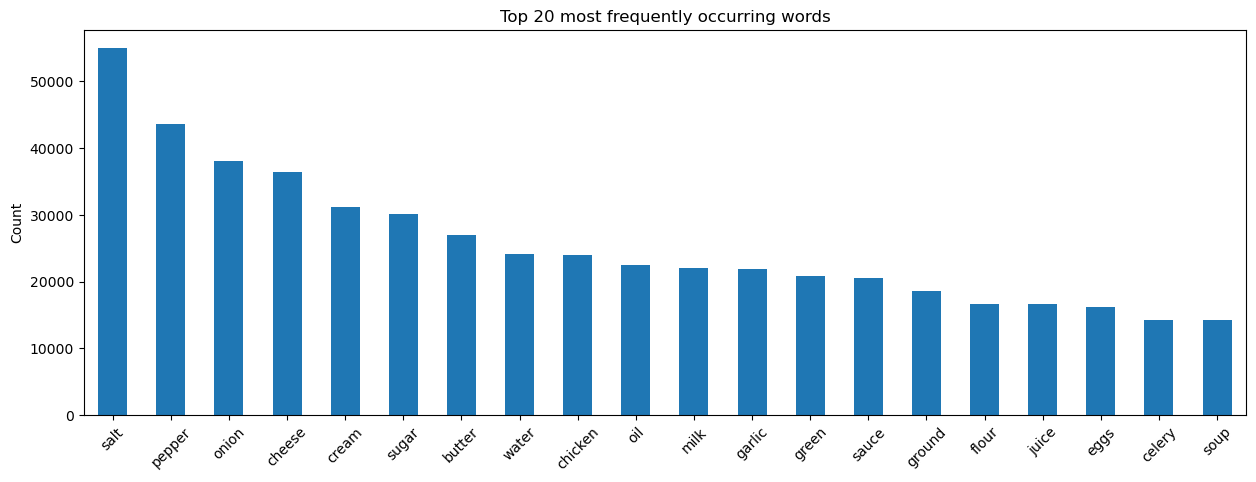

In [94]:
word_counts = pd.DataFrame(
    {"counts": ingredient_list_transformed.toarray().sum(axis=0)},
    index=bagofwords.get_feature_names_out()
).sort_values("counts", ascending=False)

word_counts.head(20).plot(kind="bar", figsize=(15, 5), legend=False)
plt.title("Top 20 most frequently occurring words")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()

##### **3.2 Histograms to Look at the Distribution of our Numerical Columns.**

Histogram plot of `serving_size`

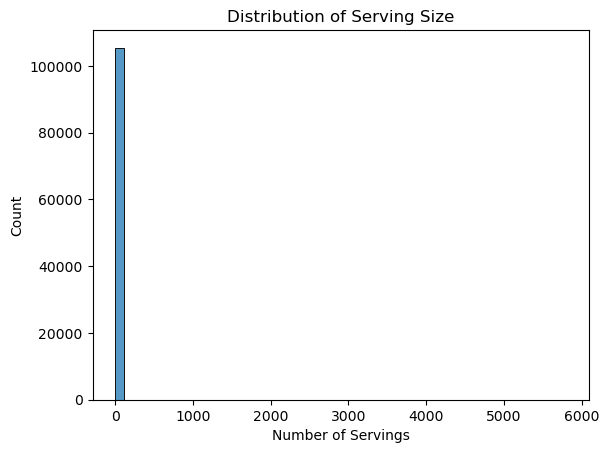

In [97]:
plt.figure()
sns.histplot(recipe_df_filtered['serving_size'], bins=50)
plt.title('Distribution of Serving Size')
plt.xlabel('Number of Servings')
plt.ylabel('Count')
plt.show()

In [98]:
recipe_df_filtered['serving_size'].value_counts()

serving_size
6       30442
4       26320
8       19414
12       6709
10       5957
        ...  
144         1
3000        1
147         1
117         1
1013        1
Name: count, Length: 96, dtype: int64

Histogram plot of `ingredient_counter`

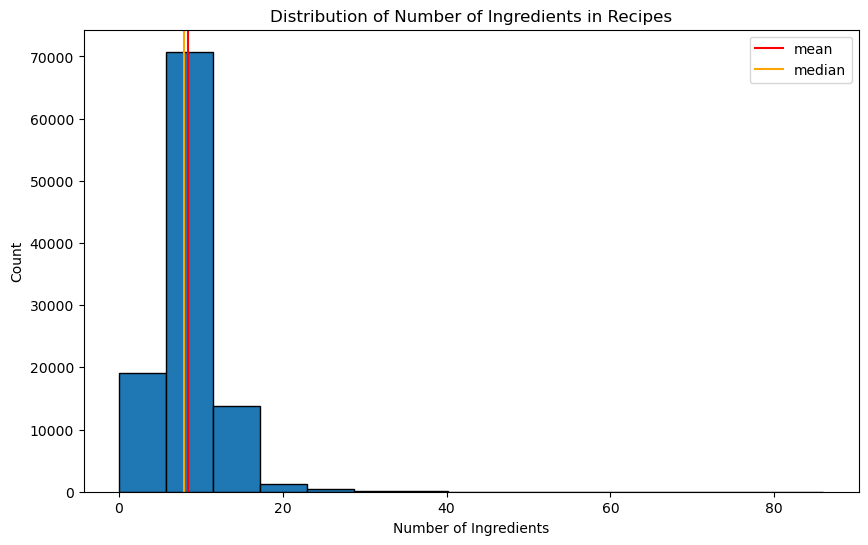

In [100]:
plt.figure(figsize=(10,6))
recipe_df_filtered.ingredient_counter.hist(bins=15, grid=False, edgecolor='black')
plt.title('Distribution of Number of Ingredients in Recipes')
plt.xlabel('Number of Ingredients')
plt.ylabel('Count')

plt.axvline(recipe_df_filtered['ingredient_counter'].mean(), c = 'red', label='mean')
plt.axvline(recipe_df_filtered['ingredient_counter'].median(), c = 'orange', label='median')

plt.legend()
plt.show()

In [101]:
recipe_df_filtered['ingredient_counter'].describe()

count    105543.000000
mean          8.393726
std           3.534658
min           0.000000
25%           6.000000
50%           8.000000
75%          10.000000
max          86.000000
Name: ingredient_counter, dtype: float64

### 4. Next Tasks

* Classify recipes as breakfast, lunch, dinner and dessert.
* Find a way to extract nutritional value information (i.e. protein, fat, sugar, calories) to add additional layers for the user to search by, as well as to add additional classification for high protein recipes. I will probably attempt webscrapping the AllRecipes website in case I am not able to achieve that using this dataset due to multiple combinations of measures for ingredients, and also due to the name of the unique ingredients not matching the name of the ingredients in the dataset from the USDA to map the nutritional values.